# Jupyter basics

Jupyter mixes text in *markdown cells* like this one, and code, as in the cell below. You can execute the code in a Python cell by pressing *Shif+Enter* in the cell, or using the run button in the toolbar.

*Work through the notebook, running and filling in the Python cells*

# Python basics

In Python, libraries are often imported using a shortened version of their name:

```python
import numpy as np
```

This will import the numpy library with the name np. Functions within that library can then be called using the syntax

```python
y = np.array([2,5,3])
```

to access functions contained in the numpy library.

Below the libraries used in this session are imported.

In [2]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import cm

# Numpy

Numpy is a Python module for working with many dimensional arrays, performing efficient vectorised operations on them, and linear algebra. It also provides random number generation facilities.

 - tensorflow functions accept numpy arrays as inputs as well as tensor objects.
 - pandas can convert data frames or series into numpy arrays.
 - scikit accepts data passed as numpy arrays.

The main feature of numpy is that it provides efficient N-dimensional arrays and operations on them.

## Creating arrays

numpy arrays are objects of the numpy.array class, which is used to create arrays of any number of dimensions.

```python
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
```

Arrays can be created from tuples or lists. A single list will construct a one-dimensional array, and a list of lists will create a two dimensional array. They can also be built using built-in constructors:

```python
b = np.ones((4,3)) # A 4 by 3 array of the value 1.0
c = np.zeros((3,4)) # A 3 by 4 array of the value 0.0
```

## Working with Numpy arrays

The shape attribute gives the size of the array in each dimension, and the total number of dimensions.

```python
a = np.array([[1,2,3],[4,5,6]])
a.shape # (2,3)
a.ndim # 2
a.dtype # dtype('int64')
```

The dtype attribute tells us the data type of the values stored in the array. This can be specified when creating the array using an additional argument:

```python
a = np.array([[1,2,3],[4,5,6]],dtype=np.float64)
b = np.ones((4,3),dtype=np.int64)
```

## Numpy ranges

To create ranges of values Numpy has an arange function that can be used to create an array filled with a range of values. It takes a starting value, end and step size just like the Python range function.

```python
a = np.arange(2,10,2) # array([2, 4, 6, 8])
```

These can be reshaped to generate more complex N-dimensional arrays using the reshape method:

```python
a = np.arange(1,28).reshape(3,3,3)
```

To generate a range of floating point values with a specific number of entries, it is better to use the linspace function:

```python
np.linspace(0,1,1000)
```

## Indexing Numpy arrays

Numpy arrays are indexed in a similar way to Python arrays, with $0$ based indexing:

```python
a = np.array([1,2,3,4,5,6,7,8])
a[2:6] # slice from index 2 to 5
```

For multidimensional arrays, an index is provided in each dimension, or can be skipped with a single : to return all values in that dimension:

```python
a = np.arange(1,28).reshape((3,3,3))
a[1,:,2] # array([12, 15, 18])
```

## N-dimensional arrays

When printing an N-dimensional array, numpy will print a nested list, where the top level list corresponds to the first axis, the next level the second axis and so on.

For example a matrix is printed as a list with one element for each row of the matrix. Each of these elements is then a list of the values in each column:

```array
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])
```

A three dimensional array is printed as a nested list from the first axis to the third:



```array
array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])
```


# Reading data with pandas

The pandas module we have imported as pd can be used to read data from CSV files. For now we will work only with numeric values, and convert the data into a numpy array.

```python
data = pd.read_csv("seeds.csv")
data.head()
```

The head() method of a pandas object can be used to display the first few rows of the data.


In [3]:
seeds_data = pd.read_csv("seeds.csv")
seeds_data.head()

,area,perimeter,compactness,length,width,asymmetry,groove length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175


## Plotting the data with seaborn

With multidimensional data it can be hard to visualise the data fully. We can use seaborn, imported as sns, to generate a pair plot showing each pairing of variables in the data.

```python
sns.pairplot(data)
```

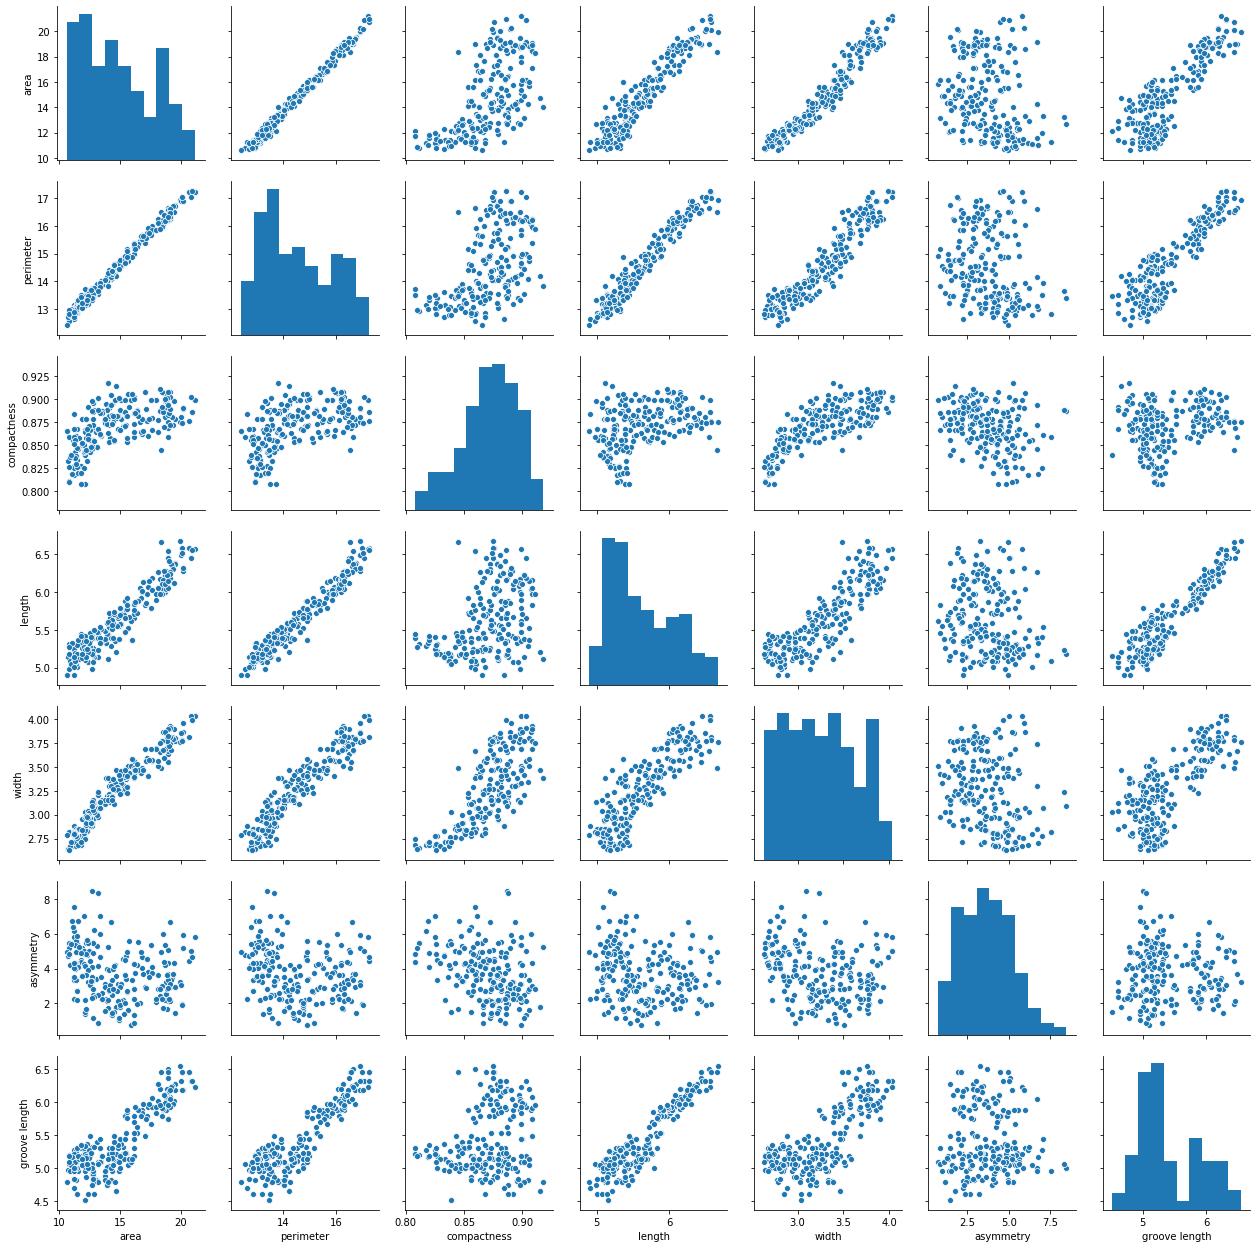

In [4]:
sns.pairplot(seeds_data)

# Using scikit-learn

Models in scikit-learn are initialised by creating an object of the corresponding class. For example to apply K-Means clustering, we create a K-Means object, specifying the number of clusters, and any configuration options:

```python
kmeans_model = KMeans(3,max_iter=100)
```

*Create a K-Means object with 4 clusters below*

In [5]:
kmeans_model = KMeans(4)

To train a model, we use the fit() method of the object we have created. In Python methods of objects are called using object.method() just as in Java or C++. This will update the model object parameters to fit the data using the K-Means algorithm.

```python
kmeans_model.fit(X)
```

*Try this now with the seeds data*

In [21]:
kmeans_model.fit(seeds_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Once a model has been trained, we can access the parameters of the model by looking at the attributes of the model object.

For K-Means clustering, the attributes are listed [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

*Look at the cluster_centers_ and labels_ attributes of the model after it has been fit to the seeds data*

In [32]:
cluster_centers = kmeans_model.cluster_centers_
labels = kmeans_model.labels_

471.0276458984066

We can plot the resulting clustering in two dimensions using PyPlot to generate a scatterplot, and adding markers for the cluster centers.

```python
plt.scatter(x=seeds_data.values[:,0],y=seeds_data.values[:,1],c=cluster_labels)
plt.scatter(x=centers[:,0],y=centers[:,1],c="red",marker="x")
```

*Generate a plot of the cluster assignment and cluster centers for compactness and groovelength*

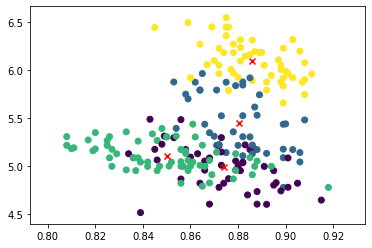

In [31]:
seeds_data.head()
plt.scatter(x=seeds_data["compactness"],y=seeds_data["groove length"],c=labels)
plt.scatter(x=cluster_centers[:,2],y=cluster_centers[:,6],c="red",marker="x")

Now try fitting KMeans models to the seeds data with numbers of clusters in the range $1$ to $10$. Remember you can write a for loop over this range in Python as:

```python
for k in range(1,11): # range stops at the end value minus 1
    ... # Generate a KMeans model with k clusters
```

To accumulate a list of values for this range, you can create an empty Python list object and append values to it:

```python
inertia = []
for k in range(1,11): # range stops at the end value minus 1
    ... # Generate a KMeans model with k clusters
    inertia.append(value)
```

*Write Python code to fit a KMeans clustering with $1$ to $10$ clusters, and collect the intertia_ attribute of each fit.*

In [33]:
inertia = []
for k in range(1,11):
    kmeans_model_i = KMeans(k)
    kmeans_model_i.fit(seeds_data)
    inertia.append(kmeans_model_i.inertia_)

inertia

[2719.853219228571,
 1011.7131675714285,
 587.3190311428009,
 471.49862366384554,
 386.1075290891407,
 323.7435502251635,
 277.6021277738779,
 241.30415435478585,
 217.83068765990643,
 201.4530075913105]

We can plot the values of the intertia using PyPlot's plot function:

```python
plt.plot(range(1,11),inertia)
```

*Plot the inertia now. What would be the optimal number of clusters using the elbow method?*

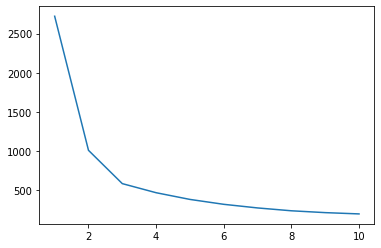

In [34]:
plt.plot(range(1,11),inertia)

## Gaussian mixture models

Now apply the same process to the seeds data using the Scikit-learn [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) model.

Instead of finding the inertia for each number of clusters, instead try using the AIC and BIC. The [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) object has methods to return these values after the model has been fit to data.

You might also want to try using the seaborn [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) function with the hue argument set to the cluster label.

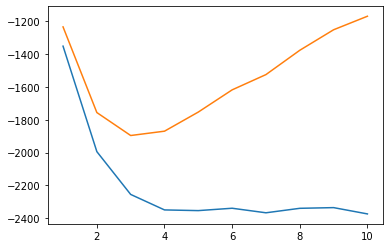

In [44]:
mix_aic = []
mix_bic = []

for i in range(1,11):

    mix = GaussianMixture(i)
    mix.fit(seeds_data)
    mix_aic.append(mix.aic(seeds_data))
    mix_bic.append(mix.bic(seeds_data))

plt.plot(range(1,11),mix_aic)
plt.plot(range(1,11),mix_bic)

# K-Means clustering implementation with numpy (optional extra)

The K-Means clustering algorithm follows two steps in a loop until the assignments $z_i$ no longer change.

**while** not converged **do**
 - For each $i$, set $z_i\leftarrow \underset{k}{\textrm{argmin}}||x_i-\mu_k||^2$
 - For each $k$, set $\mu_k\leftarrow \frac{1}{N_k}\sum_{\{i|z_i=k\}}x_i$
 
Below is an example of implementing this using the old faithful data from the first lecture.

In [1]:
faithful_data = pd.read_csv("faithful.csv")
faithful_data.head()
# scale the data
faithful_data = (faithful_data - faithful_data.mean()) / (faithful_data.max() - faithful_data.min())
data = faithful_data.values

NameError: name 'pd' is not defined

## Initialisation

First, the cluster centers $\mu_k$ are initialised to random data points using np.random.choice:

In [66]:
L = data.shape[0]
K = 5
center_indices = np.random.choice(range(L),size=K,replace=False)
centers = data[center_indices,:]
centers

array([[0.34634769, 0.322697  ],
       [0.07977626, 0.19062153],
       [0.28920483, 0.03967814],
       [0.3606334 , 0.07741398],
       [0.31291912, 0.26609323]])

We can create an array z to store the cluster membership of each data point

In [67]:
z = np.ones(L,int)

In [68]:
def objective(data,centers,z,K):
    o = 0.0
    for i in range(L):
        d = data[i,:]-centers[z[i],:]
        o+= np.sum(d*d)
    return o 

Calculate the values of the objective

In [69]:
objective(data,centers,z,K)

58.26510669306382

In [70]:
# Helper function
def plot_boundaries(data,centers,K):
    step = 0.01
    xmin = data[:, 0].min()-0.05
    xmax = data[:, 0].max()+0.05
    ymin = data[:, 1].min()-0.05
    ymax = data[:, 1].max()+0.05
    xx = np.arange(xmin,xmax,step)
    yy = np.arange(ymin,ymax,step)
    
    C = np.zeros((xx.shape[0],yy.shape[0]))
    for j,y in enumerate(yy):
        for i,x in enumerate(xx):
            ds = [] # distances
            p = np.array([x,y]) # location in grid
            for k in range(K):
                d = p-centers[k,:]
                dd = np.sum(d*d)
                ds.append(dd)
            k = ds.index(min(ds))
            C[j,i] = k

    plt.imshow(C,interpolation='nearest',
                 extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                  cmap=plt.cm.Paired,
                  aspect='auto', origin='lower')

Visualising the cluster centers and the boundaries between clusters. Coloured regions indicate points where the corresponding cluster center is the closest.

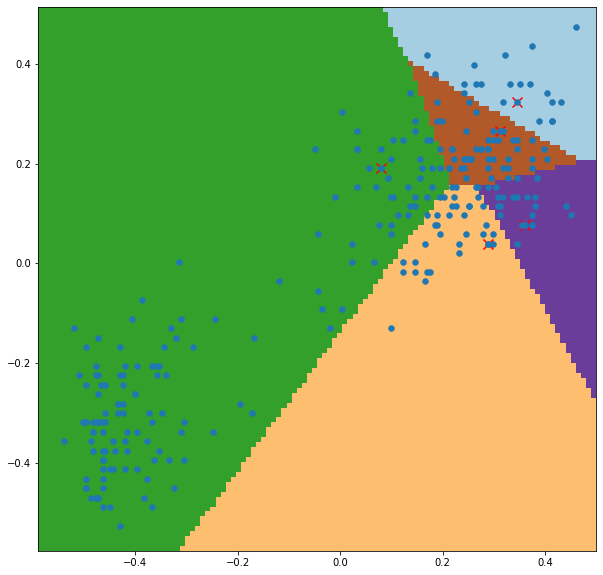

In [74]:
plt.figure(figsize=(10,10))   
plot_boundaries(data,centers,K)
plt.scatter(x=centers[:,0],y=centers[:,1],marker="x",color="red",s=100)
plt.scatter(x=data[:,0],y=data[:,1],s=30)

## Assigning data points to clusters

Fill out the code below to assign data points to the nearest cluster center. You can use Numpy broadcasting to calculate the squared distance $(x_i-\mu_j)^2$. You may find np.sum useful to sum all the values in the result.

In [71]:
for i in range(L):
    ds = []
    for j in range(K):
        # Find the distance to cluster K, append to the list ds
        # broadcasting ==
        d = data[i,:] - centers[j,:]
        d = np.sum(d*d)
        ds.append(d) # fill in
    k = ds.index(min(ds)) # Select the smallest distance
    z[i] = k

In [72]:
objective(data,centers,z,K)

51.689259995466465

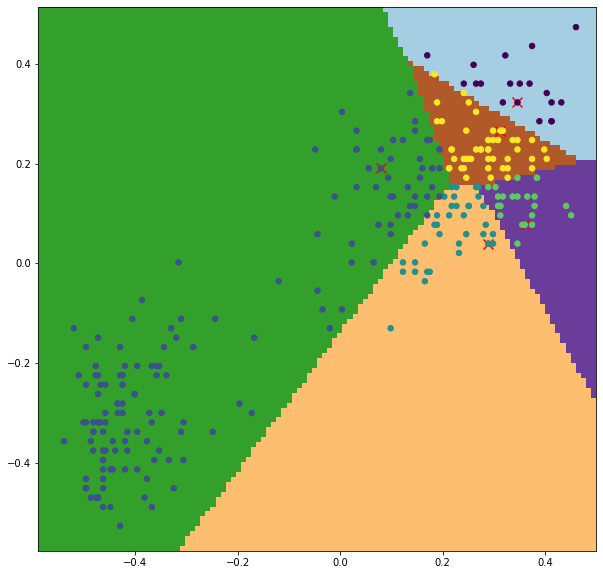

In [73]:
plt.figure(figsize=(10,10))
plot_boundaries(data,centers,K)
plt.scatter(x=centers[:,0],y=centers[:,1],marker="x",color="red",s=100)
plt.scatter(x=data[:,0],y=data[:,1],c=z,s=30)

## Calculating new cluster centers

Calculate the new cluster centers. Fill in the code to calculate the new cluster center locations. You can use data[z==k,0] to select the rows in the data where z is equal to k.

The np.mean() function can be used to calculate the mean.

In [ ]:
centers_new = np.zeros((K,2))
for k in range(K):
    centers_new[k,0] = # fill in the code to calculate the new cluster center (x, axis 0)
    centers_new[k,1] = # fill in the code to calculate the new cluster center (y, axis 1)

In [ ]:
objective(data,centers_new,z,K)

In [ ]:
plt.figure(figsize=(10,10))
plot_boundaries(data,centers,K)
plt.scatter(x=data[:,0],y=data[:,1],c=z,s=30)
plt.scatter(x=centers[:,0],y=centers[:,1],marker="x",color="red",s=100)
for k in range(K):
    plt.quiver(centers[k,0],centers[k,1],centers_new[k,0]-centers[k,0],centers_new[k,1]-centers[k,1],scale_units='xy',angles='xy',scale=1)
plt.scatter(x=centers_new[:,0],y=centers_new[:,1],marker="+",color="blue",s=100)

## Update cluster center locations

In [ ]:
centers = centers_new

Now you can run through the K-Means steps again from the **Assigning data points to clusters** step. The objective should decrease at each step.